# Hybrid Search: BM25 + OpenAI Embeddings

Build a hybrid retriever combining:
- BM25 (traditional keyword matching)
- OpenAI embeddings (semantic search)

### Why Hybrid Search Matters
Traditional search methods like BM25 excel at exact keyword matching, making them perfect for finding documents containing specific phrases. However, they struggle with capturing semantic meaning — if a document discusses the same topic using different words, it won’t match. Neural embedding-based search, on the other hand, understands context and semantics but sometimes misses exact matches.

By combining both approaches, we get the best of both worlds: precise keyword matching and semantic understanding. This creates a more robust search system that can handle diverse queries effectively.

### Core Concepts
#### 1. BM25 (Best Match 25) - Keyword Search
- Statistical ranking algorithm for text retrieval
- Full-text search excels at keyword matching and relevance scoring
- Particularly strong for exact phrase matching

#### 2. Vector Search (FAISS)
- Converts text into dense vectors in high-dimensional space
- Captures semantic meaning beyond exact keywords
- Enables similarity-based searching
- Excels in identifying information that is close in meaning to the search query, even when there are no direct keyword matches

#### 3. Hybrid Approach
- Combines results and strengths from both search methods
- Uses weighted ensemble to balance precision and recall
- Allows flexible tuning of search behavior

### System Architecture
Let’s visualize how our hybrid search system works:

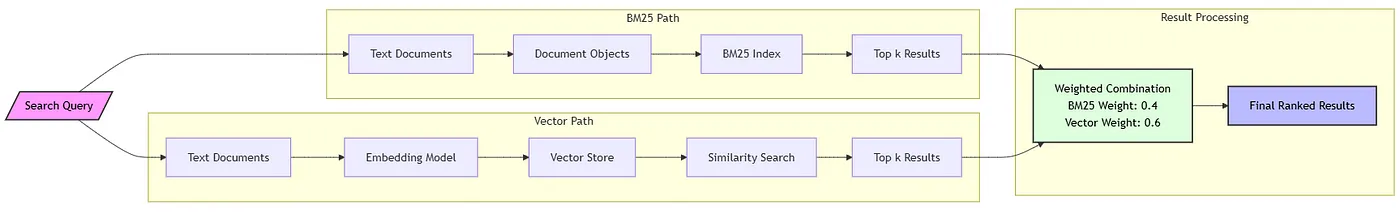

The diagram above illustrates our hybrid search system’s architecture. Both search paths operate **simultaneously** on the same query:
- The top path uses BM25 to find exact matches in the text documents
- The below path converts text to vectors and performs semantic similarity search
- Results from both paths are combined using weighted averaging, where BM25 contributes 40% and FAISS contributes 60% to the final score


#### Create virtual environment
In your command line/terminal, go to project directory, run:

``` python -m venv hybrid```

This will create a directory with necessary files to run an isolated Python environment. Then run:

`source hybrid/bin/activate`

Once activated, use pip to install packages inside the virtual environment:

```pip install <package-name>```

#### Requirements
Install these libraries if you haven't already:

- ```pip install openai```
- ```pip install langchain```
- `pip install -U langchain-community`
- `pip install rank_bm25`
- `pip install tiktoken`
- `pip install -U langchain-openai`

#### Steps to use `.env` for `OPEN_API_KEY`
1. Install `python-dotenv`
- `pip install python-dotenv`

2. Create a `.env` file in your project folder (same directory as your script), and within the file type:
`OPENAI_API_KEY=sk-xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx`

Replace `sk-xxx...` with your actual OpenAI API key.

3. Update your Python script to load the .env file:

In [1]:
import os
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

# Get the API key
api_key = os.getenv("OPENAI_API_KEY")

In [2]:
from langchain.retrievers import BM25Retriever, EnsembleRetriever
from langchain.schema import Document
from langchain_openai import OpenAIEmbeddings
from langchain.vectorstores import FAISS

def hybrid_retriever(
    texts: list,
    bm25_top_k: int = 2,
    vector_top_k: int = 2,
    weights: list = [0.4, 0.6]
):
    """
    Create a hybrid retriever combining BM25 and OpenAI Embeddings.

    Args:
        texts (list): List of text documents.
        bm25_top_k (int): Top results from BM25.
        vector_top_k (int): Top results from vector similarity search.
        weights (list): Weights for ensemble retriever [BM25 weight, vector weight].

    Returns:
        EnsembleRetriever: A hybrid retriever combining BM25 and vector search.
    """

    # Step 1: Create Document objects
    documents = [Document(page_content=text) for text in texts]

    # Step 2: Create BM25 retriever
    bm25_retriever = BM25Retriever.from_documents(documents)
    bm25_retriever.k = bm25_top_k

    # Step 3: Create Vector (FAISS) retriever using OpenAI embeddings
    embeddings = OpenAIEmbeddings(openai_api_key=api_key) # Requires an environment variable `OPENAI_API_KEY`
    vector_store = FAISS.from_documents(documents, embeddings)
    vector_retriever = vector_store.as_retriever(search_kwargs={"k": vector_top_k})

    # Step 4: Create an ensemble retriever
    ensemble_retriever = EnsembleRetriever(
        retrievers=[bm25_retriever, vector_retriever],
        weights=weights
    )

    return ensemble_retriever

In [ ]:
# Sample documents
texts = [
    "The capital of France is Paris.",
    "Machine learning enables computers to learn from data.",
    "The Mona Lisa was painted by Leonardo da Vinci.",
    "Python is a popular programming language for AI."
]

# Create the hybrid retriever
retriever = hybrid_retriever(
    texts=texts,
    bm25_top_k=2,
    vector_top_k=2,
    weights=[0.5, 0.5]  # Equal weight to BM25 and vector search
)

# Search query
query = "Who painted the famous portrait of a woman?"

# Fetch relevant documents
results = retriever.get_relevant_documents(query)

# Display results
for idx, doc in enumerate(results, start=1):
    print(f"Result {idx}: {doc.page_content}")

### Before commiting to GitHub

#### Step 1: Generate requirements.txt for jupyter notebook
`pip install pipreqs`

`pip install nbconvert`

Then, convert the hybrid_search.ipynb to the same name but python file ending in .py, and store in new folder named reqs:

`jupyter nbconvert --output-dir="./reqs" --to script hybrid_search.ipynb`    

`cd reqs`

`pipreqs`

So what we've done here is converted our notebook into a .py file in a new directory called reqs, then run pipreqs in the new directory. The reason for this is that pipreqs only works on .py files and I can't seem to get it to work when there are other files in the folder. The requirements.txt will be generated in the same folder.

#### Step 2: Generate .gitignore

Method 1: Visit https://github.com/github/gitignore, find the Python/gitignore, copy-paste it into your own .gitignore file.

Method 2: Visit https://www.toptal.com/developers/gitignore, type: python, macos, jupyter, visualstudiocode, virtualenv. 
Then click “Create” and save the result as .gitignore.